In [19]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
df1=pd.read_csv('C:\\Users\\MAYBHOSA\\Downloads\\category_abandoned_rate.csv')
df2=pd.read_csv('C:\\Users\\MAYBHOSA\\Downloads\\freq_visits.csv')

In [20]:
df1

,Unnamed: 0,category_id,rate
0,0,1487580004832248652,98.886414
1,1,1487580004857414477,94.728485
2,2,1487580004882580302,98.858447
3,3,1487580004916134735,93.683488
4,4,1487580004983243602,100.000000
...,...,...,...
437,437,2193074740686488401,100.000000
438,438,2195085255034011676,99.711816
439,439,2195085255117897760,100.000000
440,440,2195085255176618020,100.000000


In [21]:
a = df1.drop(['Unnamed: 0'], axis = 1)

In [22]:
a

,category_id,rate
0,1487580004832248652,98.886414
1,1487580004857414477,94.728485
2,1487580004882580302,98.858447
3,1487580004916134735,93.683488
4,1487580004983243602,100.000000
...,...,...
437,2193074740686488401,100.000000
438,2195085255034011676,99.711816
439,2195085255117897760,100.000000
440,2195085255176618020,100.000000


In [23]:
b = df2.drop(['Unnamed: 0','brand','price'], axis = 1)

In [24]:
b

,category_id,frequency
0,1487580006317032337,63812
1,1487580010100293687,23920
2,1487580010796548183,8720
3,1933472286753424063,827
4,1487580010872045658,4932
...,...,...
441,2177933350667289121,1960
442,2187686850687140020,30
443,1487580005293622112,12
444,2187790129827939246,38


In [25]:
output = pd.merge(a,b, on ='category_id',how ='inner')
output

,category_id,rate,frequency
0,1487580004832248652,98.886414,4162
1,1487580004857414477,94.728485,12058
2,1487580004882580302,98.858447,4821
3,1487580004916134735,93.683488,22482
4,1487580004983243602,100.000000,44
...,...,...,...
437,2193074740686488401,100.000000,343
438,2195085255034011676,99.711816,4416
439,2195085255117897760,100.000000,318
440,2195085255176618020,100.000000,727


In [26]:
values = (0,100)
final_output = output[output.isin(values)  == False]
final_output = final_output.dropna()
final_output

,category_id,rate,frequency
0,1487580004832248652,98.886414,4162
1,1487580004857414477,94.728485,12058
2,1487580004882580302,98.858447,4821
3,1487580004916134735,93.683488,22482
5,1487580005008409427,96.523898,5929
...,...,...,...
424,2151191071051219817,94.531934,7472
426,2151191071378375538,99.210823,7180
431,2177933350667289121,94.533333,1960
435,2193074740552270669,98.916409,3315


In [27]:
scaler = MinMaxScaler()
final_output[['rate','category_id']]
final_output

,category_id,rate,frequency
0,1487580004832248652,98.886414,4162
1,1487580004857414477,94.728485,12058
2,1487580004882580302,98.858447,4821
3,1487580004916134735,93.683488,22482
5,1487580005008409427,96.523898,5929
...,...,...,...
424,2151191071051219817,94.531934,7472
426,2151191071378375538,99.210823,7180
431,2177933350667289121,94.533333,1960
435,2193074740552270669,98.916409,3315


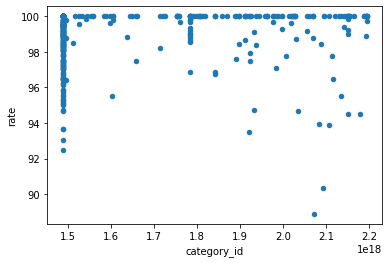

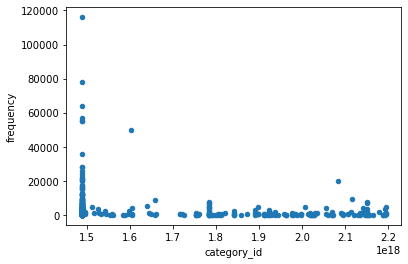

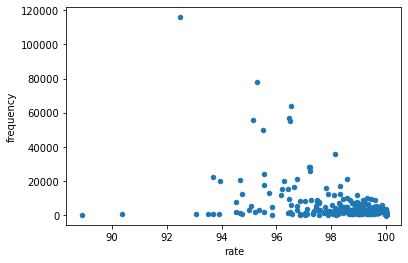

In [28]:
cols=output.columns
for i in range(0,10):
    for j in range(i+1,3):
            output.plot(kind='scatter',x=cols[i],y=cols[j])

In [29]:
scaler = MinMaxScaler()
final_output[['rate','category_id']]=scaler.fit_transform(final_output[['rate','category_id']])
final_output

,category_id,rate,frequency
0,0.000000e+00,0.910589,4162
1,3.556977e-11,0.531879,12058
2,7.113954e-11,0.908042,4821
3,1.185656e-10,0.436699,22482
5,2.489884e-10,0.695408,5929
...,...,...,...
424,9.379592e-01,0.513977,7472
426,9.379592e-01,0.940137,7180
431,9.757572e-01,0.514104,1960
435,9.971583e-01,0.913321,3315


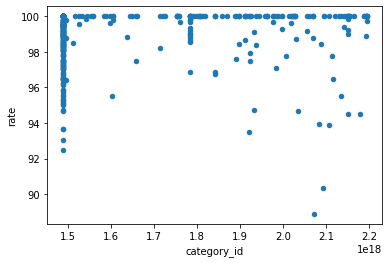

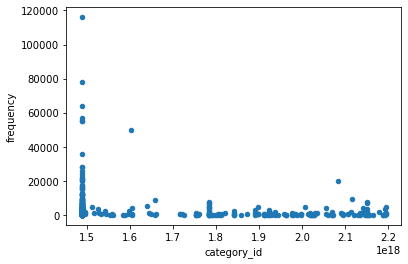

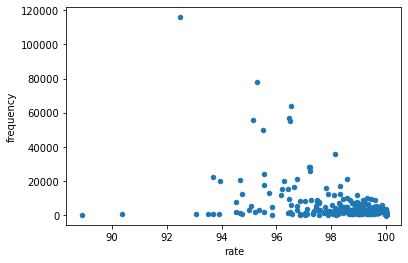

In [30]:
cols=output.columns
for i in range(0,3):
    for j in range(i+1,3):
            output.plot(kind='scatter',x=cols[i],y=cols[j])

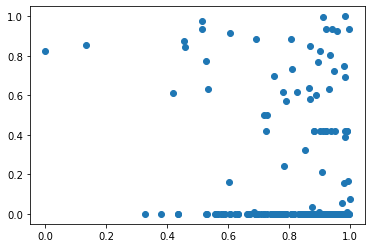

In [31]:
#x_min= 2
#X_max = 180
plt.scatter(final_output['rate'],final_output['category_id'])
#plt.xlim(2,180)
#plt.ylim(2,120000)
plt.show()

In [32]:
x = final_output.iloc[:,0:2]
x

,category_id,rate
0,0.000000e+00,0.910589
1,3.556977e-11,0.531879
2,7.113954e-11,0.908042
3,1.185656e-10,0.436699
5,2.489884e-10,0.695408
...,...,...
424,9.379592e-01,0.513977
426,9.379592e-01,0.940137
431,9.757572e-01,0.514104
435,9.971583e-01,0.913321


In [33]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [34]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Abandonment rate')

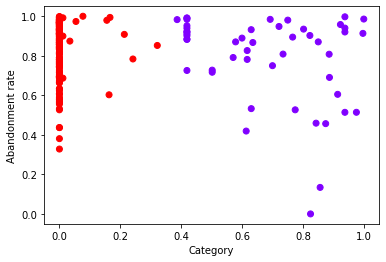

In [35]:
data_with_clusters = final_output.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['category_id'],data_with_clusters['rate'],c = data_with_clusters['Clusters'],cmap = 'rainbow')
plt.xlabel('Category')
plt.ylabel('Abandonment rate')

Text(0, 0.5, 'WCSS')

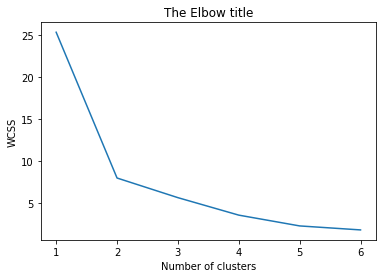

In [36]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [42]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
score = {}
K=range(2,10)

 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    pred = kmeanModel.fit_predict(x)
    
 
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    score[k] = metrics.silhouette_score(x,pred)
score

{2: 0.7109116095850139,
 3: 0.5908020498375052,
 4: 0.5950620008507786,
 5: 0.6142442365649846,
 6: 0.5678420243868982,
 7: 0.5729175627155179,
 8: 0.5751721770995897,
 9: 0.5351166938883226}

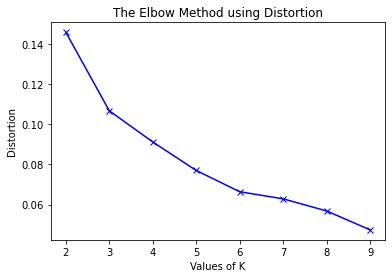

In [41]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()